<a href="https://colab.research.google.com/github/asf72/ml_lab/blob/main/221002172_CSE412_222D3_LabPerformance10_DCLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
import re
import string

In [5]:
df=pd.read_csv('/content/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
def preprocess(text):
  text=text.lower()
  text=re.sub(r'\d+','', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = text.strip()
  return text

In [9]:
df['message'] = df['v2'].apply(preprocess)
df['label_num'] = df['v1'].map({'ham':0, 'spam':1})

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
x= vectorizer.fit_transform(df['message'])
y=df['label_num']

In [11]:
best_f1 =0
best_state = 0
results=[]

In [12]:
for state in range(0, 100):
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=state)
  model = MultinomialNB()
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  f1 = f1_score(y_test, y_pred)
  if f1 > best_f1:
    best_f1 = f1
    best_state = state
    results.append((state, f1))


In [13]:
print(f'Best F1 Score: {best_f1}')
print(f'Best State: {best_state}')

Best F1 Score: 0.8945454545454545
Best State: 91


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=best_state)
model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [17]:
print("\nEvaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)



Evaluation Metrics:
Accuracy  : 0.9740
Precision : 1.0000
Recall    : 0.8092
F1 Score  : 0.8945

Confusion Matrix:
[[963   0]
 [ 29 123]]


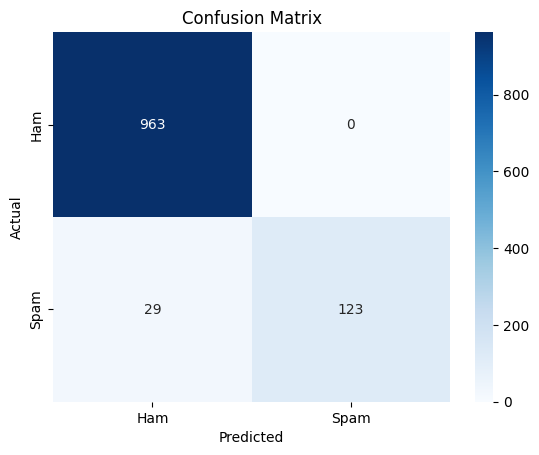

In [19]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()